# PHASE 3 PROJECT: SYRIA TELECOMMUNICATIONS CUSTOMER CHURN PROJECT
# Done by: Edwin Mbuthia


# 1. BUSINESS UNDERSTANDING
SyriaTel is one of the leading telecommunications providers in Syria, established in 2000. It operates as a mobile network operator and is renowned for offering a wide range of telecommunication services, including mobile voice, data, and internet services across Syria. SyriaTel has played a pivotal role in the development of the country's telecommunications infrastructure, providing comprehensive coverage to both urban and rural areas. The company focuses on enhancing customer experience through innovative solutions, competitive pricing, and expanding its service offerings to meet the evolving needs of its customers. Despite the challenges posed by the ongoing conflict and economic difficulties in Syria, SyriaTel has managed to maintain its operations and continues to invest in network expansion and technological upgrades. Its mission is to connect people and improve lives by providing reliable and affordable telecommunication services, thereby contributing to the socio-economic development of Syria.
# 1.1 Business Problem
Syria Telcom seek to predict whether their customers will soon leave the company and shift to a different telco. High customer churn rates directly impact the revenue and profitability of telecommunications companies. Therefore, understanding the factors that contribute to churn  would allow Syria telco to take proactive measures, such as targeted marketing, loyalty programs, or customer service improvements, to retain customers.
# 1.2 Objectives
- Develop a Predictive Model for Custmer Churn: The primary objective of this project is to build a Machine Learning classifier that predicts whether a customer will soon stop doing business with SyriaTel. The predictive capability of the model will minimize customer loss and stabilize the customer base hence reducing revenue loss.
- Drivers of Customer Churn: Second goal is to identify the factors that would result into high customer churn.
- Analyze Churn Trends across Different States: The last objective of this project if to examine churn trends across different states to better understand which states are likely to have high churn rates.


# 2. Data Understanding

I will first import all the necessary libraries that we will require to conduct the project.

In [1]:
# Import relevant Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split, cross_validate,cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


##### I will now explore the dataset to gain more insights.

In [3]:
data.shape

(3333, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In this dataset, there are no missing values

## 2.1 Data Description

In [5]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

state: Categorical variable indicating the customer's state.

account length: Numeric variable indicating the length of the customer account.

area code: Numeric variable indicating the area code of the customer.

phone number: Categorical variable (likely to be excluded as it won't contribute to churn prediction).

international plan: Categorical variable indicating if the customer has an international plan.

voice mail plan: Categorical variable indicating if the customer has a voicemail plan.

number vmail messages: Numeric variable indicating the number of voicemail messages.

total day/eve/night/intl minutes: Numeric variables indicating usage minutes in various time segments.

total day/eve/night/intl calls: Numeric variables indicating the number of calls in various time segments.

total day/eve/night/intl charge: Numeric variables indicating charges in various time segments.

customer service calls: Numeric variable indicating the number of customer service calls made by the customer.

churn: Binary target variable indicating customer churn (True/False).

# 3.0 Data Exploration & Preparation
In this bit I looked for any missing values in my dataset, removed any irrelevant columnns & converted categorical variables into numerical variables.

In [6]:
# Check for missing values
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values within this dataset.

In [7]:
# Here i will drop the area code and phone number columns as they are not that relevant in predicting whether Syria telcommunications retains a client or not.In place of the area code, I will use the state column to actually know from which state is a customer most likely to stop using SyriaTel.

data.drop(columns=['area code','phone number'],inplace=True)
data

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


I will then combine the total day minutes, total evening minutes, total night minutes and the total international minutes columns to come up with a Total minutes column. I will also combine the total day charge, total evening charge, total night charge and the total international charge columns to come up with a Total charges column. Combine the total day calls, total evening calls, total night calls and the total international calls columns to come up with a Total calls column.

In [8]:
data['Total minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes']+data['total intl minutes']
data['Total charges'] = data['total day charge'] + data['total eve charge'] + data['total night charge']+data['total intl charge']
data['Total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls']+data['total intl calls']
data



,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total minutes,Total charges,Total calls
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,False,717.2,75.56,303
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,False,625.2,59.24,332
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,False,539.4,62.29,333
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,False,564.8,66.80,255
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,False,512.0,52.09,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,83,12.56,9.9,6,2.67,2,False,660.7,60.10,292
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,123,8.61,9.6,4,2.59,3,False,585.4,63.53,239
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,91,8.64,14.1,6,3.81,2,False,675.6,67.74,264
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,...,137,6.26,5.0,10,1.35,2,False,517.6,57.53,336


In [9]:
columns_to_drop = [ 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes',
    'total day charge', 'total eve charge', 'total night charge', 'total intl charge',
    'total day calls', 'total eve calls', 'total night calls', 'total intl calls']
data.drop(columns=columns_to_drop, inplace=True)

In [10]:
data

,state,account length,international plan,voice mail plan,number vmail messages,customer service calls,churn,Total minutes,Total charges,Total calls
0,KS,128,no,yes,25,1,False,717.2,75.56,303
1,OH,107,no,yes,26,1,False,625.2,59.24,332
2,NJ,137,no,no,0,0,False,539.4,62.29,333
3,OH,84,yes,no,0,2,False,564.8,66.80,255
4,OK,75,yes,no,0,3,False,512.0,52.09,359
...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,2,False,660.7,60.10,292
3329,WV,68,no,no,0,3,False,585.4,63.53,239
3330,RI,28,no,no,0,2,False,675.6,67.74,264
3331,CT,184,yes,no,0,2,False,517.6,57.53,336


In [11]:
#Move the target variable column 'Churn' and have it as the last column in our dataset.
column_to_move = 'churn'
column_data = data.pop(column_to_move)
data[column_to_move] = column_data

data

,state,account length,international plan,voice mail plan,number vmail messages,customer service calls,Total minutes,Total charges,Total calls,churn
0,KS,128,no,yes,25,1,717.2,75.56,303,False
1,OH,107,no,yes,26,1,625.2,59.24,332,False
2,NJ,137,no,no,0,0,539.4,62.29,333,False
3,OH,84,yes,no,0,2,564.8,66.80,255,False
4,OK,75,yes,no,0,3,512.0,52.09,359,False
...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,2,660.7,60.10,292,False
3329,WV,68,no,no,0,3,585.4,63.53,239,False
3330,RI,28,no,no,0,2,675.6,67.74,264,False
3331,CT,184,yes,no,0,2,517.6,57.53,336,False


## Explore Categorical Variables
Here i will explore the categorical data within my dataset.

In [12]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['state', 'international plan', 'voice mail plan']


There are 3 categorical variables in this dataset. First, I will check missing values in categorical variables.  

In [13]:
data[categorical].isna().sum()

state                 0
international plan    0
voice mail plan       0
dtype: int64

There are no missing values in the categorical columns. I will then proceed to check on the labels in each of the categorical variables.

### Explore the state variable

In [14]:
data['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [15]:
# check frequency distribution of values in state variable
data["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
ID     73
MI     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
CO     66
WA     66
NV     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [16]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(data["state"], drop_first=True).head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore the International Plan Variable

In [17]:
data["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

### Explore the Voice mail plan variable

In [18]:
data["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

## Explore the Numerical variables

In [19]:
numerical = [var for var in data.columns if data[var].dtype !='O' if data[var].dtype !='bool']
print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['account length', 'number vmail messages', 'customer service calls', 'Total minutes', 'Total charges', 'Total calls']


### Summary of numerical variables
#### .There are 6 numerical variables.
#### .These are given by account length, number of voice mail messages, customer service calls, total minutes, total charges and total calls.
##### .All of the numerical variables are of continuous type.

In [20]:
data[numerical].describe()

,account length,number vmail messages,customer service calls,Total minutes,Total charges,Total calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,1.562856,591.864776,59.449754,305.137114
std,39.822106,13.688365,1.315491,89.954251,10.502261,34.448164
min,1.000000,0.000000,0.000000,284.300000,22.930000,191.000000
25%,74.000000,0.000000,1.000000,531.500000,52.380000,282.000000
50%,101.000000,0.000000,1.000000,593.600000,59.470000,305.000000
75%,127.000000,20.000000,2.000000,652.400000,66.480000,328.000000
max,243.000000,51.000000,9.000000,885.000000,96.150000,416.000000


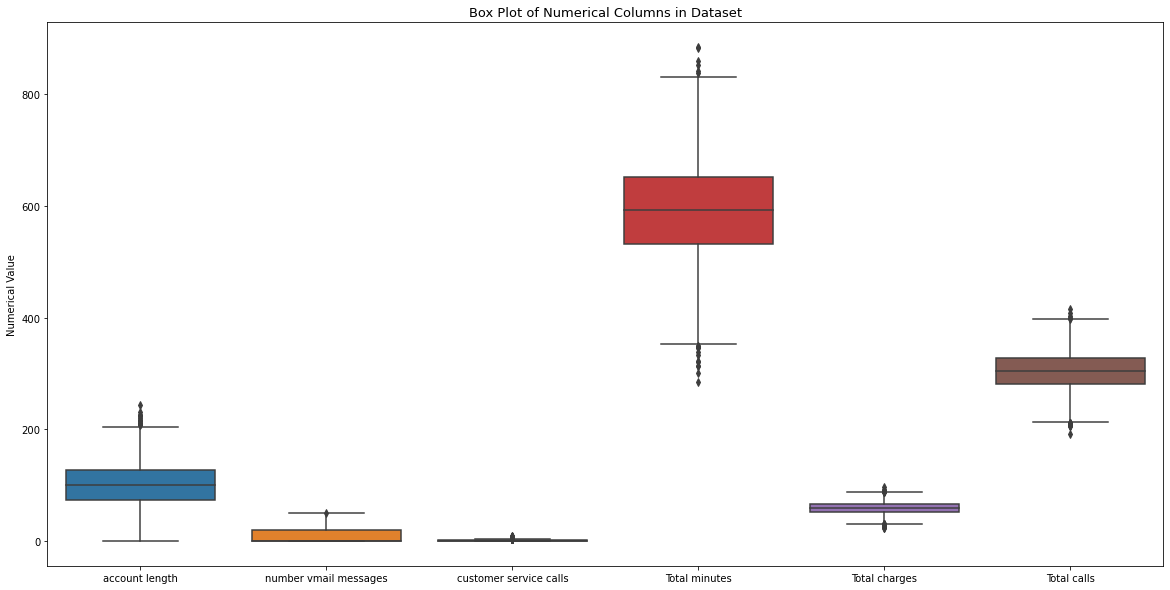

In [21]:
numerical_col = ['account length','number vmail messages','customer service calls', 'Total minutes','Total charges','Total calls']
plt.figure(figsize=(20, 10))
sns.boxplot(data=[data[col] for col in numerical_col])
plt.title("Box Plot of Numerical Columns in Dataset", fontsize=13)
plt.ylabel("Numerical Value")
plt.xticks(range(0,6), numerical_col)
plt.show()

From the boxplot above, we can see that all the numerical columns contain outliers.


### Check for Distribution of the Numerical variables

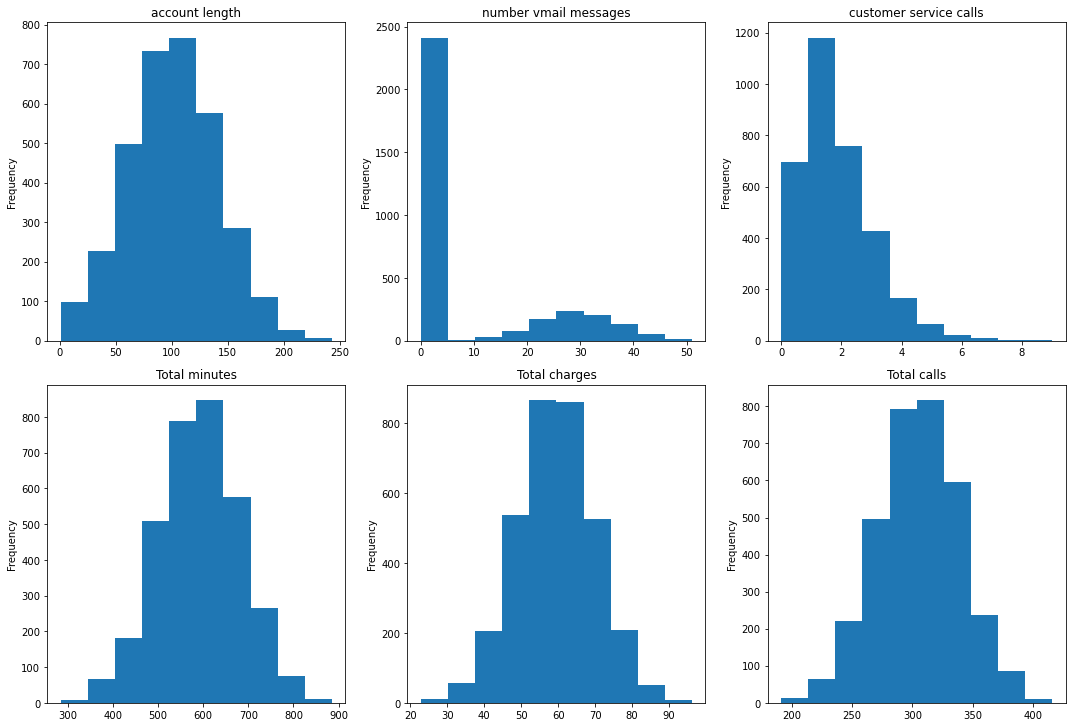

In [22]:
numerical_col = ['account length','number vmail messages','customer service calls', 'Total minutes','Total charges','Total calls']
fig = plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_col):
    ax = plt.subplot(3, 3, i+1)
    data[col].plot(kind='hist', ax=ax, title=col)
plt.tight_layout()
plt.show()

In [23]:
# find outliers for account length variable
IQR = data["account length"].quantile(0.75) - data["account length"].quantile(0.25)
Lower_fence = data["account length"].quantile(0.25) - (IQR * 3)
Upper_fence = data["account length"].quantile(0.75) + (IQR * 3)
print('Account length outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Account length outliers are values < -85.0 or > 286.0


In [24]:
# find outliers for Number of voice mail messages variable
IQR = data["number vmail messages"].quantile(0.75) - data["number vmail messages"].quantile(0.25)
Lower_fence = data["number vmail messages"].quantile(0.25) - (IQR * 3)
Upper_fence = data["number vmail messages"].quantile(0.75) + (IQR * 3)
print('Number voice mail messages outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Number voice mail messages outliers are values < -60.0 or > 80.0


In [25]:
# find outliers for Customer service calls messages variable
IQR = data["customer service calls"].quantile(0.75) - data["customer service calls"].quantile(0.25)
Lower_fence = data["customer service calls"].quantile(0.25) - (IQR * 3)
Upper_fence = data["customer service calls"].quantile(0.75) + (IQR * 3)
print('Customer service calls outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Customer service calls outliers are values < -2.0 or > 5.0


In [26]:
# find outliers for Total minutes variable
IQR = data["Total minutes"].quantile(0.75) - data["Total minutes"].quantile(0.25)
Lower_fence = data["Total minutes"].quantile(0.25) - (IQR * 3)
Upper_fence = data["Total minutes"].quantile(0.75) + (IQR * 3)
print('Total minutes outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Total minutes outliers are values < 168.79999999999973 or > 1015.1000000000004


In [27]:
# find outliers for Total charges variable
IQR = data["Total charges"].quantile(0.75) - data["Total charges"].quantile(0.25)
Lower_fence = data["Total charges"].quantile(0.25) - (IQR * 3)
Upper_fence = data["Total charges"].quantile(0.75) + (IQR * 3)
print('Total charges outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Total charges outliers are values < 10.079999999999998 or > 108.78


In [28]:
# find outliers for Total calls variable
IQR = data["Total calls"].quantile(0.75) - data["Total calls"].quantile(0.25)
Lower_fence = data["Total calls"].quantile(0.25) - (IQR * 3)
Upper_fence = data["Total calls"].quantile(0.75) + (IQR * 3)
print('Total calls outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Total calls outliers are values < 144.0 or > 466.0


## 3.1 Data Preprocessing
In this section, using OneHot Encoder, I will create a new binary column for each unique category, with 1 indicating the presence of the category and 0 otherwise. I will first check my target variable column.

In [29]:
data['churn'].unique()

array([False,  True])

Our target variable is binary so there is no need of OneHot Encoding it.

#### 3.1.1 SPLITTING THE DATA INTO FEATURE (X) AND TARGET (y) DATASETS

In [30]:
X = data.drop(columns=['churn'], axis=1)
y = data['churn']
X.head()

,state,account length,international plan,voice mail plan,number vmail messages,customer service calls,Total minutes,Total charges,Total calls
0,KS,128,no,yes,25,1,717.2,75.56,303
1,OH,107,no,yes,26,1,625.2,59.24,332
2,NJ,137,no,no,0,0,539.4,62.29,333
3,OH,84,yes,no,0,2,564.8,66.80,255
4,OK,75,yes,no,0,3,512.0,52.09,359


### One Hot Encoding Categorical Columns

In [31]:
X = pd.get_dummies(X, columns=categorical,drop_first=True)
X

,account length,number vmail messages,customer service calls,Total minutes,Total charges,Total calls,state_AL,state_AR,state_AZ,state_CA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,25,1,717.2,75.56,303,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,107,26,1,625.2,59.24,332,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,137,0,0,539.4,62.29,333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84,0,2,564.8,66.80,255,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,75,0,3,512.0,52.09,359,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,2,660.7,60.10,292,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3329,68,0,3,585.4,63.53,239,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3330,28,0,2,675.6,67.74,264,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3331,184,0,2,517.6,57.53,336,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 4. Modelling

### 4.1 What is the goal of Machine Learning?
The goal is to help SyriaTel proactively identify customers who are at risk of leaving, allowing the company to intervene and reduce churn, which is critical for maintaining revenue and market share.

Accurately predicting whether or not a customer is going to leave SyriaTel would help the company take steps to try and retain the customers.The model would also help allocate resources to the right customers. Those who aren't likely to leave the company.

It would also help the company address the various painpoints that are most likely going to lead to customer churn.

For this project, I will build several models using different classifiers and then compare the performance metrics to choose the best classifier. These will be:

- Logistic Regression
- Decision Tree Classifier
- Cross-validation modelling

### 4.2 Test-Train-Split
I will first perform a test train test split of my data. The training set will be 80% and the testing set 20%. Then set the random state to 42 to ensure reproducibility.

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [33]:
X_train.shape

(2666, 58)

In [34]:
y_train.shape

(2666,)

In [35]:
X_train.describe()

,account length,number vmail messages,customer service calls,Total minutes,Total charges,Total calls,state_AL,state_AR,state_AZ,state_CA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,...,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.691673,7.981245,1.573143,591.066579,59.380780,304.867967,0.023256,0.015379,0.019880,0.010128,...,0.022131,0.021755,0.023256,0.020630,0.021380,0.025506,0.031508,0.022881,0.096399,0.271943
std,39.522338,13.647218,1.338454,89.597407,10.437991,34.219452,0.150743,0.123077,0.139614,0.100144,...,0.147136,0.145911,0.150743,0.142169,0.144676,0.157687,0.174719,0.149551,0.295193,0.445044
min,1.000000,0.000000,0.000000,284.300000,23.250000,191.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,1.000000,532.100000,52.320000,281.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,0.000000,1.000000,592.400000,59.415000,305.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,19.000000,2.000000,651.275000,66.287500,328.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,243.000000,51.000000,9.000000,885.000000,96.150000,408.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above code block,we can see that the mean values have a high range difference with the highest value being 591 and the lowest being 0.01. I will therefore scale the features to standardize the contribution of each feature to the model, ensuring faster and more stable convergence. 

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [37]:
X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
    )

In [38]:
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [39]:
X_train.describe()

,account length,number vmail messages,customer service calls,Total minutes,Total charges,Total calls,state_AL,state_AR,state_AZ,state_CA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
count,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,...,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03
mean,1.332601e-17,1.066081e-17,-2.998352e-18,5.303751e-16,-2.318725e-16,-3.331502e-16,2.065531e-17,1.599121e-17,-5.197143e-17,2.798462e-17,...,-5.730183e-17,-5.730183e-17,2.232106e-17,-2.132161e-17,7.995605e-18,-7.062784e-17,-2.665202e-18,-2.132161e-17,1.599121e-17,6.663004e-18
std,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,...,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00
min,-2.522887e+00,-5.849355e-01,-1.175564e+00,-3.424476e+00,-3.462118e+00,-3.328204e+00,-1.543033e-01,-1.249762e-01,-1.424191e-01,-1.011491e-01,...,-1.504373e-01,-1.491283e-01,-1.543033e-01,-1.451369e-01,-1.478088e-01,-1.617837e-01,-1.803688e-01,-1.530245e-01,-3.266241e-01,-6.111618e-01
25%,-7.007902e-01,-5.849355e-01,-4.282933e-01,-6.582517e-01,-6.765770e-01,-6.976279e-01,-1.543033e-01,-1.249762e-01,-1.424191e-01,-1.011491e-01,...,-1.504373e-01,-1.491283e-01,-1.543033e-01,-1.451369e-01,-1.478088e-01,-1.617837e-01,-1.803688e-01,-1.530245e-01,-3.266241e-01,-6.111618e-01
50%,-1.750409e-02,-5.849355e-01,-4.282933e-01,1.488515e-02,3.279005e-03,3.859143e-03,-1.543033e-01,-1.249762e-01,-1.424191e-01,-1.011491e-01,...,-1.504373e-01,-1.491283e-01,-1.543033e-01,-1.451369e-01,-1.478088e-01,-1.617837e-01,-1.803688e-01,-1.530245e-01,-3.266241e-01,-6.111618e-01
75%,6.657820e-01,8.075508e-01,3.189776e-01,6.721145e-01,6.618147e-01,6.761176e-01,-1.543033e-01,-1.249762e-01,-1.424191e-01,-1.011491e-01,...,-1.504373e-01,-1.491283e-01,-1.543033e-01,-1.451369e-01,-1.478088e-01,-1.617837e-01,-1.803688e-01,-1.530245e-01,-3.266241e-01,1.636228e+00
max,3.601382e+00,3.152791e+00,5.549874e+00,3.281217e+00,3.523295e+00,3.014408e+00,6.480741e+00,8.001524e+00,7.021530e+00,9.886392e+00,...,6.647288e+00,6.705633e+00,6.480741e+00,6.890046e+00,6.765496e+00,6.181091e+00,5.544195e+00,6.534900e+00,3.061624e+00,1.636228e+00


### 4.3 Baseline Metrics

Before modelling, i will first determine what to expect to get with a 'dummy' model that always predicts a customer will leave the company(True).
0(False) will represent the likelihood of retaining a customer while 1(True) represents the likelihood of a customer leaving.

Since I am going to use the test data to model, i will use the test data here.


In [40]:
np.bincount(y_test)

array([566, 101], dtype=int64)

From the above code block, it is evident that the target is imbalanced. I will then calculate different classification metrics to evaluate the model's performance for the True and False labels.

Below is the confusion matrix: 

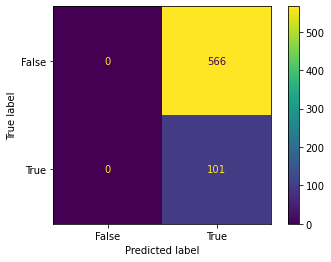

In [42]:
ConfusionMatrixDisplay.from_estimator(estimator=DummyClassifier(strategy='constant',constant=1).fit(X_train,y_train),X=X_test,y=y_test);

For the baseline metrics, I will assume that the model always chooses 1.

In [48]:
baseline_accuracy = 101/(101+566)
baseline_precision =  101/(101+566)
baseline_recall = 101/101
baseline_f1score = 2*((baseline_precision*baseline_recall)/(baseline_precision+baseline_recall))

print('baseline_accuracy:',baseline_accuracy)
print('baseline_precision:',baseline_precision)
print('baseline_recall:',baseline_recall)
print('baseline_f1score:',baseline_f1score)

baseline_accuracy: 0.15142428785607195
baseline_precision: 0.15142428785607195
baseline_recall: 1.0
baseline_f1score: 0.2630208333333333


### 4.4 Instantiate & Fit a Logistic Regression Model

I will then use the LogisticRegression model from scikit-learn, specify a random state of 42 as well as and use default hyperparameters.

I will then use the scaled data to fit the model and i will also display the confusion matrix.

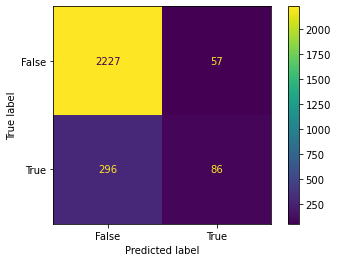

In [49]:
model=LogisticRegression(random_state=42,solver='liblinear')
model.fit(X_train,y_train)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X_train, y=y_train);